In [1]:
%%capture
! pip install grad-cam

In [1]:
import sys
import os
from pathlib import Path

# Obtener el directorio raíz del proyecto (dos niveles arriba desde el notebook)
project_root = Path(os.getcwd()).parent

# Añadir el directorio raíz y el subdirectorio que contiene el módulo networks al sys.path
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

/usr/lib/python3/dist-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ./c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Model loaded successfully for inference
PROJ_ROOT path is: /home/guillermo/ssd/Github/Fine-Tuned-Thermal-Breast-Cancer-Diagnosis


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(


FOLD 2
-------------------------------


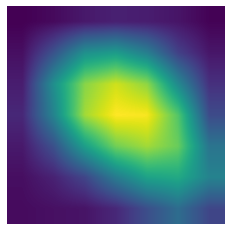

In [2]:
from pytorch_grad_cam import GradCAM
import numpy as np 
import torch
from networks import resnet
import matplotlib.pyplot as plt
from pytorch_grad_cam.utils.image import show_cam_on_image
# import cv2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the model status from checkpoint
model = resnet(n_channels=1, num_classes=1, fine_tune='full')  
checkpoint = torch.load('../checkpoints/resnet_16_full_0001/8eolahko_7_checkpoint.pth', map_location=device, weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])
# model.load_state_dict(checkpoint)
for param in model.parameters():
    param.requires_grad = True
model = model.to(device)
model.eval()
print("Model loaded successfully for inference")

from make_dataset import get_data
from utils import make_transforms

transforms = make_transforms(True)
data = get_data(transform=make_transforms(False), normalize=True, slices=10, fold=2)

idx = 12

target_layers = [model.layer4[-1]] # una antes del GAP
input_tensor = data[1][idx][0].unsqueeze(0).to(device)

# Construct the CAM object once, and then re-use it on many images:
# cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device.type == 'cuda')
cam = GradCAM(model=model, target_layers=target_layers)

# Define the target (if using BCE with a single output, just use 0)
# targets = [ClassifierOutputTarget(0)]
targets = None

# Generate the CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
plt.imshow(np.transpose(grayscale_cam, (1,2,0)))
plt.axis('off')
plt.show()

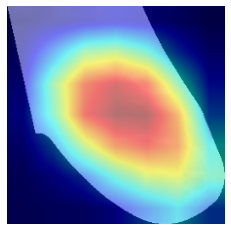

In [3]:
# Cargar y preparar la imagen
img = data[1][idx][0].numpy()
img = img / np.max(img)
img = np.float32(np.transpose(img, (1,2,0)))

# Llamar a la función con los parámetros adecuados
visualization = show_cam_on_image(img, grayscale_cam.squeeze(0), use_rgb=True)
plt.imshow(visualization)
plt.axis('off')
plt.show()

Model loaded successfully for inference
FOLD 2
-------------------------------


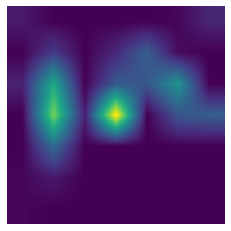

In [4]:
# Load the model status from checkpoint
model = resnet(n_channels=1, num_classes=1, fine_tune='full')  
checkpoint = torch.load('../checkpoints/bad_models/k4eatb32_bad_resnet_32_full_0001.pth', map_location=device, weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])
# model.load_state_dict(checkpoint)
for param in model.parameters():
    param.requires_grad = True
model = model.to(device)
model.eval()
print("Model loaded successfully for inference")

from make_dataset import get_data
from utils import make_transforms

transforms = make_transforms(True)
data = get_data(transform=make_transforms(False), normalize=True, slices=10, fold=2)

idx = 12

target_layers = [model.layer4[-1]] # una antes del GAP
# input_tensor = data[0][0][0].repeat(3, 1, 1).unsqueeze(0).to(device)
input_tensor = data[1][idx][0].unsqueeze(0).to(device)

# Construct the CAM object once, and then re-use it on many images:
# cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device.type == 'cuda')
cam = GradCAM(model=model, target_layers=target_layers)

# Define the target (if using BCE with a single output, just use 0)
# targets = [ClassifierOutputTarget(0)]
targets = None

# Generate the CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
plt.imshow(np.transpose(grayscale_cam, (1,2,0)))
plt.axis('off')
plt.show()

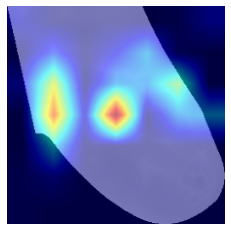

In [5]:
# Cargar y preparar la imagen
img = data[1][idx][0].numpy()
img = img / np.max(img)
img = np.float32(np.transpose(img, (1,2,0)))

# Llamar a la función con los parámetros adecuados
visualization = show_cam_on_image(img, grayscale_cam.squeeze(0), use_rgb=True)
plt.imshow(visualization)
plt.axis('off')
plt.show()